## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
#ex 1
import pandas as pd
datas = pd.read_csv('data_000637.txt',sep=',',header=0)
df = pd.DataFrame(data=datas)
print("max size:",df.size)



N = int(input("inserire numero maggiore di 10K ma minore o uguale a max size:"))
df[:N]



max size: 7864320
inserire numero maggiore di 10K ma minore o uguale a max size:200000


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
199995,1,0,139,3869202157,76,0
199996,1,0,62,3869202157,76,2
199997,1,1,2,3869202157,94,15
199998,1,1,1,3869202157,96,13


In [3]:
#ex 2
maxs = df['BX_COUNTER'].max()
print("the number of bx in a orbit is:",maxs+1) 

the number of bx in a orbit is: 3564


In [4]:
#ex 3 
 
max_orbit = df['ORBIT_CNT'].max() #trovo il massimo tra le orbite-->corrisponde all' 'ora' più grande
#print(max_orbit)

df_mask=df['ORBIT_CNT']==max_orbit #faccio una maschera per vedere le misurazioni fatte in quell'ora 
filtered_df = df[df_mask]
max_bx = filtered_df['BX_COUNTER'].max()
#print(max_bx)

filtered_df_mask=filtered_df['BX_COUNTER']==max_bx #tra le misurazioni in quell'ora trovo quella coi 'minuti' più alti 
filtered_df2 = filtered_df[filtered_df_mask]
print(filtered_df2) #si vede che c'è solo un valore 

#conversione:
print("\n the data taking last:",(max_bx*25)+((maxs+1)*max_orbit*25),"ns")


         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1310718     1     0          139  3869211171         769         0

 the data taking last: 344746715355325 ns


In [5]:
#ex 4
df['ABSOLUTE_TIME']=(df['ORBIT_CNT']*3564*25)+(df['BX_COUNTER']*25)+(df['TDC_MEAS']*(25/30))

#df[:N]
df_time=df.sort_values(by='ABSOLUTE_TIME')
df_time

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310719,1,0,61,3869211171,762,18,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14


In [6]:
#ex 5
import random
import numpy as np
df['HEAD'] = np.random.randint(2, size=(len(df), 1))
df[:30]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
5,0,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,0,0,139,3869200167,2776,0,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14


In [7]:
#ex 6
df2 = pd.DataFrame(data=df[df['HEAD'] == 1])
df2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
...,...,...,...,...,...,...,...
1310708,1,0,124,3869211171,199,9,3.447467e+14
1310710,1,1,36,3869211171,427,13,3.447467e+14
1310713,1,0,64,3869211171,758,18,3.447467e+14
1310714,1,0,60,3869211171,762,2,3.447467e+14


Text(0, 0.5, 'COUNTS')

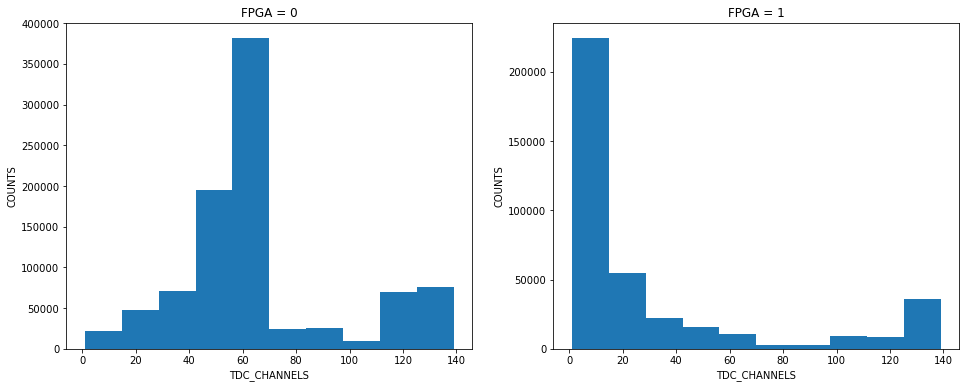

In [8]:
#ex 7
import matplotlib.pyplot as plt      
 
filtered_df0 = df[df['FPGA']==0]  
filtered_df1 = df[df['FPGA']==1] 

fig, ( ax1 , ax2 ) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.hist(filtered_df0['TDC_CHANNEL'])
ax1.set_title('FPGA = 0')
ax1.set_xlabel("TDC_CHANNELS")
ax1.set_ylabel("COUNTS")


ax2.hist(filtered_df1['TDC_CHANNEL']) 
ax2.set_title('FPGA = 1')
ax2.set_xlabel("TDC_CHANNELS")
ax2.set_ylabel("COUNTS")


In [12]:
#ex 8
a=filtered_df0.groupby(['FPGA', 'TDC_CHANNEL'])['TDC_MEAS'].count().sort_values(ascending = False)
b=filtered_df1.groupby(['FPGA', 'TDC_CHANNEL'])['TDC_MEAS'].count().sort_values(ascending = False)
print("The top 3 noisy channels for FPGA=0 are:\n",a.head(3))
print("The top 3 noisy channels for FPGA=1 are:\n",b.head(3)) 
 


The top 3 noisy channels for FPGA=0 are:
 FPGA  TDC_CHANNEL
0     139            75617
      64             64581
      63             63724
Name: TDC_MEAS, dtype: int64
The top 3 noisy channels for FPGA=1 are:
 FPGA  TDC_CHANNEL
1     2              32669
      139            32442
      1              28438
Name: TDC_MEAS, dtype: int64


In [16]:
#ex 9
uniques = df.drop_duplicates(subset = ["ORBIT_CNT"])
print("uniques orbits:",len(uniques))           

unique_mask = uniques['TDC_CHANNEL']==139     #uniques   
filtered_uniques = uniques[unique_mask] 
print("uniques orbits with TDC_CHANNEL = 139:",len(filtered_uniques)) 


uniques orbits: 11001
uniques orbits with TDC_CHANNEL = 139: 203
